In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
y = iris.target
X = iris.data
# 作为数组，X是几维？
X.shape  # (150, 4)
#作为数据表或特征矩阵，X是几维？
import pandas as pd
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# 调用PCA
pca = PCA(n_components=2)  # 实例化
pca = pca.fit(X)  # 拟合模型
X_dr = pca.transform(X)  # 获取新矩阵

X_dr
# 也可以fit_transform一步到位
X_dr = PCA(2).fit_transform(X)

In [10]:
# 也可以还原
pca.inverse_transform(X_dr)

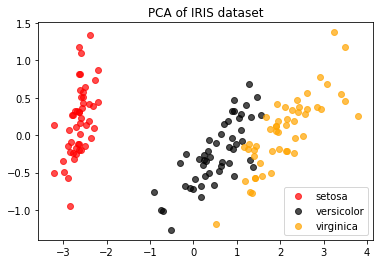

In [12]:
# 要将三种鸢尾花的数据分布显示在二维平面坐标系中，对应的两个坐标（两个特征向量）应该是三种鸢尾花降维后的x1和x2，怎样才能取出三种鸢尾花下不同的x1和x2呢？

X_dr[y == 0, 0]  # 这里是布尔索引，看出来了么？

# 要展示三中分类的分布，需要对三种鸢尾花分别绘图
# 可以写成三行代码，也可以写成for循环
"""
plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c="red", label=iris.target_names[0])
plt.scatter(X_dr[y==1, 0], X_dr[y==1, 1], c="black", label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c="orange", label=iris.target_names[2])
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()
"""
colors = ['red', 'black', 'orange']
iris.target_names
plt.figure()
for i in range(3):
    plt.scatter(X_dr[y == i, 0],
                X_dr[y == i, 1],
                alpha=0.7,  # 指画出的图像的透明度
                c=colors[i],
                label=iris.target_names[i])
plt.legend()  # 图例
plt.title('PCA of IRIS dataset')
plt.show()

In [15]:
# 属性explained_variance_，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
# 查看方差是否从大到小排列，第一个最大，依次减小   array([4.22824171, 0.24267075])
pca.explained_variance_

# 属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
# 又叫做可解释方差贡献率
pca.explained_variance_ratio_  # array([0.92461872, 0.05306648])
# 大部分信息都被有效地集中在了第一个特征上

pca.explained_variance_ratio_.sum()  # 0.977685206318795

0.977685206318795

### 累积可解释方差贡献率曲线

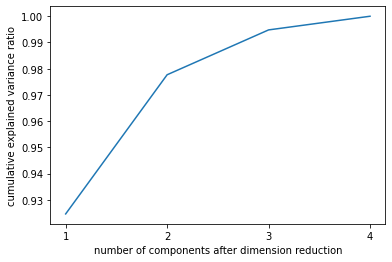

In [18]:
import numpy as np
pca_line = PCA().fit(X)
# pca_line.explained_variance_ratio_#array([0.92461872, 0.05306648, 0.01710261, 0.00521218])
plt.plot([1, 2, 3, 4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1, 2, 3, 4])  # 这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

### 最大似然估计自选超参数

In [26]:
pca_mle = PCA(n_components='mle')
# pca_mle = pca_mle.fit(X)
# X_mle = pca_mle.transform(X)
X_mle = pca_mle.fit_transform(X)
X_mle  # 3列的数组
# 可以发现，mle为我们自动选择了3个特征

pca_mle.explained_variance_ratio_.sum()  # 0.9947878161267247
# 得到了比设定2个特征时更高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么高的信息含量，并不
# 需要去纠结于只保留2个特征，毕竟三个特征也可以可视化

0.9947878161267247

In [25]:
pca_mle.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

### 按信息量占比选超参数

In [27]:
pca_f = PCA(n_components=0.97, svd_solver='full')  # svd_solver="full"不能省略
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
X_f
pca_f.explained_variance_ratio_  # array([0.92461872, 0.05306648])

array([0.92461872, 0.05306648])

### X(m, n) = X_pca(m, k)V(k, n)

In [28]:
# X.shape()#(m,n)
PCA(2).fit(X).components_.shape  # (2, 4)

PCA(2).fit(X).components_  # V(k,n)
# array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
#        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])